# CS530 Homework 7 Part 2

Queston 1 (1 points) 

a. Fit a KNN classifier on the Heart Disease dataset from Homework 6 (data is also included in the folder here) using the Scikit-learn package, plot your ROC curve on the testing set and compute the AUC. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from heapq import nsmallest
from scipy.stats import mode
%matplotlib inline

In [2]:
# Gives the best k to choose 
def best_k(xtrain,ytrain,xtest,ytest):
    krange = range(1,25) # 24 possible k's
    scores = []
    for k in krange:
        knn = knc(n_neighbors = k)
        knn.fit(xtrain,ytrain)
        ypred = knn.predict(xtest)
        scores.append(metrics.accuracy_score(ytest,ypred))
    i = np.argmax(scores)
    return krange[i]

The AUC is 0.8274


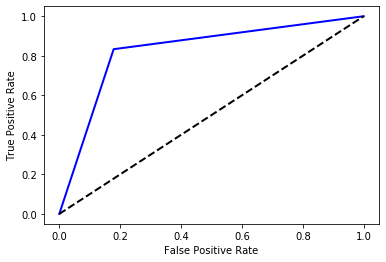

In [3]:
# Your code goes here
train = pd.read_csv('train.csv', index_col =0)
xtrain = train.drop(['target'], axis = 1)
ytrain = train['target']
test = pd.read_csv('test.csv', index_col = 0)
xtest = test.drop(['target'], axis = 1)
ytest = test['target']

#KNN
def knn(xtrain,ytrain,xtest,k):
    scaler = StandardScaler()
    scaler.fit(xtrain)
    scaler.fit(xtest)
    xtrain = scaler.transform(xtrain)
    xtest = scaler.transform(xtest)
    
    knn_class_tr = knc(n_neighbors = k).fit(xtrain, ytrain)
    y_pred = knn_class_tr.predict(xtest)
    return y_pred
    

y_pred = knn(xtrain,ytrain,xtest,11)
fpr, tpr, threshold = metrics.roc_curve(ytest, y_pred)
auc = metrics.auc(fpr, tpr)
print("The AUC is",round(auc,4))
plt.plot(fpr, tpr, 'b-', lw = 2, label = 'data, auc = ' + str(auc))
plt.plot([0, 1], [0, 1], 'k--', lw = 2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

b. Compare your result with HW6. Does KNN do better on the classification? Explain


In [4]:
# KNN does worse on classification in this case. Its AUC is 83% compared to Logistic Regression's, which was 93%.
# In my speculation, KNN is worse for classification b/c it suffers from the curse of dimensionality.
# The more dimensions the data set contains, it more difficult for the algorithm to determine the correlation/relationship
# between the points & their labels. 
# Logistic Regression performed better b/c it was able to apply multi-variable Logistic Regression 
# to determine the labels. 

Question 2 (2 points) Implement from scratch the function MyKNN() that classifies the matrix X_test (samples × features) using the KNN algorithm we learned in class. The inputs for the function should be the training set X_train, the labels y_train, the parameter k, and the matrix X_test. The output for the function should be y_test, your prediction for the label of X_test. Test your function on the Iris dataset and compare it to the KNN classifier (use the default parameters other than n_neighbors) of scikit-learn for that dataset (as in Question 1).


In [5]:
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [6]:
# Calculate Euclidean distance
def dist(x,y):
    d = distance.euclidean(x,y)
    return d

In [7]:
iris_xtrain, iris_xtest, iris_ytrain, iris_ytest = train_test_split(x, y, test_size = 0.5)

In [8]:
k = best_k(iris_xtrain, iris_ytrain,iris_xtest, iris_ytest)
k

5

In [9]:
# The function 'get_labels' function will take in lists of all the distances + k smallest distances + training labels
# It will iterate thru the list of 'smallest distances', finding the indices of those values in the 'distances' list
# and match those indices to the corresponding labels in 'training labels'.
# Once the possible labels are put in a list, it returns the mode of that list as a predicted value.

def get_labels(distances, smallest_distances, ytrain):
    label = []
    for i in smallest_distances:
        ind = distances.index(i)  # Returns the indices of those distances
        p = ytrain[ind]  # Match those points to their labels from the training set
        label.append(p)
    most_freq = mode(label) # Identify the mode of each list 
    return most_freq[0]

# This function uses the x-training + testing set, y training set & desired 'k' nearest samples as its parameters.
# It calculates the distances b/w pts in x training & testing set, takes the 'k' smallest distances and uses get_labels
# to get the predicted labels.

def myKNN(xtrain,xtest,ytrain, k):
    ypred = np.array([])
    for i in xtest:
        distances = []
        for j in xtrain:
            d = dist(i,j)
            distances.append(d)
            smallest = nsmallest(k, distances) 
        y = get_labels(distances, smallest, ytrain)
        ypred = np.append(ypred, y)
    return ypred

In [10]:
myKNN_ypred = myKNN(iris_xtrain, iris_xtest, iris_ytrain, k)
print("The accuracy is", round(metrics.accuracy_score(iris_ytest, myKNN_ypred),4))

The accuracy is 0.9733


In [11]:
KNN_ypred = knn(iris_xtrain, iris_ytrain, iris_xtest, k)
print("The accuracy between myKNN & native KNN functions is", round(metrics.accuracy_score(iris_ytest,KNN_ypred),4))

The accuracy between myKNN & native KNN functions is 0.92


Question 3 (3 points) 

a. Create two 2-dimensional Gaussian (normal) distribution with mean (1,0) and (-1,0), and the identity matric as their covariance matrices. Create labels for the data of the two distribution, apply train-test-split, and use KNN to make a prediction on the test set. (Hint: Use the [numpy.random.multivariate_normal](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html) to create normal distribution dataset) 

In [15]:
# Your code goes here
mean1 = np.array([1,0])
cov = np.array([(1, 0), (0, 1)])  # diagonal covariance
mean2 = np.array([-1,0])

def random_data(mean1,mean2,cov,n):
    x1 = np.random.multivariate_normal(mean1, cov, n).T # First data set X's
    x2 = np.random.multivariate_normal(mean2, cov, n).T # Second data set X's
    
    x = np.append(x1,x2)
        
    # Making labels 
    y1 = [0]
    y2 =[1]

    label1 = y1*n 
    label2 = y2*n
    labels = label1 + label2 # Concatenating the labels
    
    len1 = int(len(x))
    len2 = int(len(labels))
    g = int(len1/len2)
    
    X = x.reshape(len2,g)
    
    xtrain, xtest, ytrain, ytest = train_test_split(X, labels, test_size = 0.5)
    
    k = best_k(xtrain,ytrain,xtest,ytest)
    ypred = knn(xtrain,ytrain,xtest,k)
    acc = round(metrics.accuracy_score(ypred,ytest),4)
    return acc

In [17]:
acc = random_data(mean1,mean2,cov,1000)
print("The accuracy is", acc)

The accuracy is 0.692


b. Now, we want to create Gaussians of dimensions 1 to 100 to see what happens to KNN as the number of dimensions close. Therefore, use a for loop to simulate two Gaussian distributions with dimensions from 1 to 100. Keep the distance between the center of the two distributions the same. One way to do this is to have the mean of the one distribution bee (1,0,0,...,0) and the other one be (-1,0,0,...,0). In other words, both Gaussians would have their center at 0 in all dimensions except $x_1$. Keep the covariance matrices as identity matrices. Hence, the distance between the two distributions will always be 2. Now, as before, apply a train-test-split, predict on the test set, and record the accuracies in each iteration of the loop. Finally, plot your accuracies over the number of dimensions using matplotlib.

In [18]:
# Your code goes here
dimensions = np.arange(1,101)
n = 1000
accuracy = []

for i in dimensions:
    mean1 = [1] + [0]*(i-1)
    mean2 = [-1] + [0]*(i-1)
    cov = np.identity(i)
    a = random_data(mean1,mean2,cov,n)
    accuracy.append(a)
print(accuracy)

[0.842, 0.68, 0.634, 0.602, 0.586, 0.557, 0.564, 0.564, 0.545, 0.557, 0.529, 0.541, 0.52, 0.545, 0.539, 0.515, 0.509, 0.547, 0.538, 0.495, 0.512, 0.507, 0.51, 0.523, 0.503, 0.495, 0.499, 0.478, 0.52, 0.513, 0.503, 0.551, 0.543, 0.526, 0.519, 0.513, 0.501, 0.518, 0.507, 0.506, 0.493, 0.494, 0.493, 0.515, 0.482, 0.506, 0.515, 0.499, 0.513, 0.513, 0.527, 0.518, 0.496, 0.526, 0.526, 0.532, 0.508, 0.509, 0.474, 0.478, 0.502, 0.524, 0.505, 0.515, 0.522, 0.485, 0.49, 0.528, 0.505, 0.511, 0.516, 0.509, 0.522, 0.505, 0.453, 0.491, 0.535, 0.533, 0.493, 0.495, 0.506, 0.527, 0.491, 0.5, 0.508, 0.492, 0.524, 0.509, 0.49, 0.493, 0.523, 0.512, 0.516, 0.482, 0.476, 0.504, 0.548, 0.512, 0.498, 0.512]


c. Discuss what you found in the accuracy plot in 3b. Why do you think you got those results?

Text(0, 0.5, 'Accuracy')

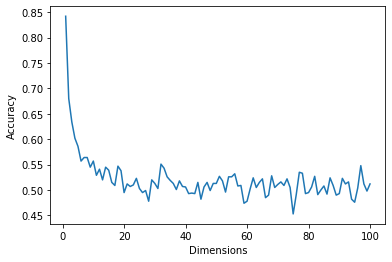

In [19]:
plt.plot(dimensions,accuracy)
plt.xlabel("Dimensions")
plt.ylabel("Accuracy")

In [ ]:
# The accuracy is clearly fluctuating as we iterate through the list of dimensions.
# My conclusion is this algorithm's accuracy does not necessarily converge as we increase the number of dimensions.